**Round 1**
- Import the required libraries and modules that you would need.
- Read that data into Python and call the dataframe `churnData`.
- Check the datatypes of all the columns in the data. You would see that the column `TotalCharges` is object type. Convert this column into numeric type using `pd.to_numeric` function.
- Check for null values in the dataframe. Replace the null values.
- Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
  - Split the data into a training set and a test set.
  - Scale the features either by using normalizer or a standard scaler.
  - (optional)Fit a logistic Regression model on the training data.
  - Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

In [144]:
# Import the required libraries and modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

%matplotlib inline

In [145]:
# Read that data into Python and call the dataframe churnData.
data = pd.read_csv("DATA_Customer-Churn.csv")
data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [146]:
# Check the datatypes of all the columns in the data. 
# You would see that the column TotalCharges is object type. 
# Convert this column into numeric type using pd.to_numeric function.

result = data.dtypes
print(result)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object


In [147]:
#data.isnull().values.any()

data['TotalCharges'].replace(' ', np.nan, inplace=True) #Replace empty rows with NA
data


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,One year,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,One year,103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,Yes,No,No,No,No,No,Month-to-month,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,No,No,No,No,No,No,Month-to-month,74.40,306.6,Yes


In [148]:
data.dropna(subset=['TotalCharges'], inplace=True) #drop NA

In [149]:
data[["TotalCharges"]] = data[["TotalCharges"]].apply(pd.to_numeric) #Convert TotalCharges column into numeric.

In [150]:
result = data.dtypes
print(result)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [151]:
# Check for null values in the dataframe. Replace the null values.
data.isnull().values.any()

False

-Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:  
-Split the data into a training set and a test set.  
-Scale the features either by using normalizer or a standard scaler.  
-(optional)Fit a logistic Regression model on the training data.  
-Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.  

In [152]:
#Use the following features: `tenure`, `SeniorCitizen`, `MonthlyCharges` and `TotalCharges`:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X = data.select_dtypes(include=numerics)
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65
...,...,...,...,...
7038,0,24,84.80,1990.50
7039,0,72,103.20,7362.90
7040,0,11,29.60,346.45
7041,1,4,74.40,306.60


In [153]:
#X, y split
y=data['Churn']
X=data_num
y

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [154]:
y=pd.get_dummies(y, drop_first=True)
y

,Yes
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


In [155]:
#scaling the df

scaler = StandardScaler()
scaler.fit(X)
churnData_scaled = scaler.transform(X)
X = pd.DataFrame(churnData_scaled, columns=X.columns)
X

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,-0.440327,-1.280248,-1.161694,-0.994194
1,-0.440327,0.064303,-0.260878,-0.173740
2,-0.440327,-1.239504,-0.363923,-0.959649
3,-0.440327,0.512486,-0.747850,-0.195248
4,-0.440327,-1.239504,0.196178,-0.940457
...,...,...,...,...
7027,-0.440327,-0.343137,0.664868,-0.129180
7028,-0.440327,1.612573,1.276493,2.241056
7029,-0.440327,-0.872808,-1.170004,-0.854514
7030,2.271039,-1.158016,0.319168,-0.872095


In [156]:
# Split the data into a training set and a test set.
TT_SPLIT = 0.2     # ratio train/test size #proportion test set split
RAND_STATE = 123   # specifies a sampling for repeatable results

In [157]:
#train/test, create df
## X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE)

X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=TT_SPLIT,random_state=RAND_STATE)

In [158]:
X_test


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6819,-0.440327,0.105047,-1.482464,-0.705415
364,-0.440327,-0.587601,0.369028,-0.401591
2062,2.271039,1.327365,1.274831,1.989380
6953,-0.440327,0.675462,-0.282484,0.219402
4860,-0.440327,0.186535,1.153503,0.652384
...,...,...,...,...
4275,-0.440327,0.797694,1.211674,1.331415
2612,-0.440327,-1.280248,-1.502408,-0.998716
2765,-0.440327,-0.628345,0.922482,-0.338920
4898,-0.440327,1.612573,1.033837,2.060720


In [159]:
y_test

,Yes
6830,0
364,0
2067,0
6964,0
4868,1
...,...
4282,0
2617,1
2770,1
4906,0


In [160]:
# Fit a Knn Classifier(NOT KnnRegressor please!)model on the training data.

model = KNeighborsClassifier(n_neighbors=3,weights='uniform') # declare we're using knn classification model
model.fit(X_train, y_train) # train model #we fit our model with X_train and y_train
y_pred = model.predict(X_test) # predict test
y_pred_train=model.predict(X_train) # predict train (for sanity checks)
#model.predict_proba(inputdata)
#how well the model does on the train set and on the test set

In [161]:
y_pred [0:5]

array([0, 0, 0, 0, 1], dtype=uint8)

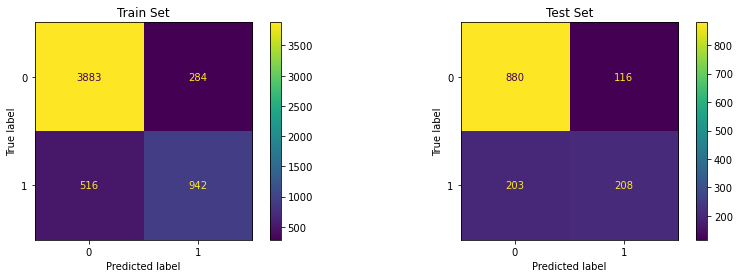

In [162]:
# Create confusion matrix
fig, ax = plt.subplots(1,2, figsize=(14,4))

plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

,Error_metric,Train,Test
0,Accuracy,0.796267,0.775409
1,Precision,0.661051,0.657692
2,Recall,0.453433,0.429648


Confusion matrix for the train set
[[3812  342]
 [ 804  667]]


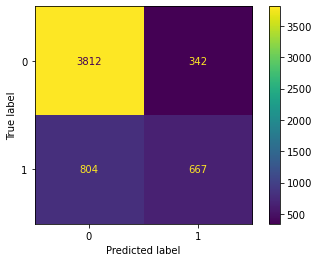



Confusion matrix for the test set
[[920  89]
 [227 171]]


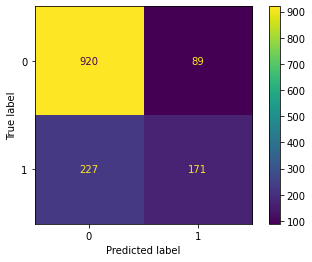

In [163]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix


log_model = LogisticRegression() 

## Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11)

trans = PowerTransformer()

trans.fit(X_train)

X_train_mod = trans.transform(X_train)
X_test_mod  = trans.transform(X_test)

log_model.fit(X_train_mod, y_train)

y_pred_train_log = log_model.predict(X_train_mod)
y_pred_test_log = log_model.predict(X_test_mod)

performance_log = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_log),
                                         precision_score(y_train, y_pred_train_log),
                                         recall_score(y_train, y_pred_train_log)],
                               'Test': [accuracy_score(y_test, y_pred_test_log),
                                        precision_score(y_test, y_pred_test_log),
                                        recall_score(y_test, y_pred_test_log)]})

display(performance_log)

print("Confusion matrix for the train set")
print(confusion_matrix(y_train,y_pred_train_log))
plot_confusion_matrix(log_model,X_train_mod,y_train, values_format = 'd')
plt.show()

print()
print()

print("Confusion matrix for the test set")
print(confusion_matrix(y_test, y_pred_test_log))
plot_confusion_matrix(log_model,X_test_mod,y_test, values_format = 'd')
plt.show()

## Round 2

Fit a Decision Tree Classifier on the training data.
Check the accuracy on the test data.

In [166]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.tree import DecisionTreeRegressor


# create a decision tree classifier object
dtc = DecisionTreeClassifier()

# fit the classifier on the training data
dtc.fit(X_train, y_train)




DecisionTreeClassifier()

In [167]:
accuracy = dtc.score(X_test, y_test)

# print the accuracy
print("Accuracy on test data: {:.2f}".format(accuracy))

Accuracy on test data: 0.68


,Error_metric,Train,Test
0,Accuracy,0.789511,0.759773
1,Precision,0.653805,0.625000
2,Recall,0.414684,0.376884


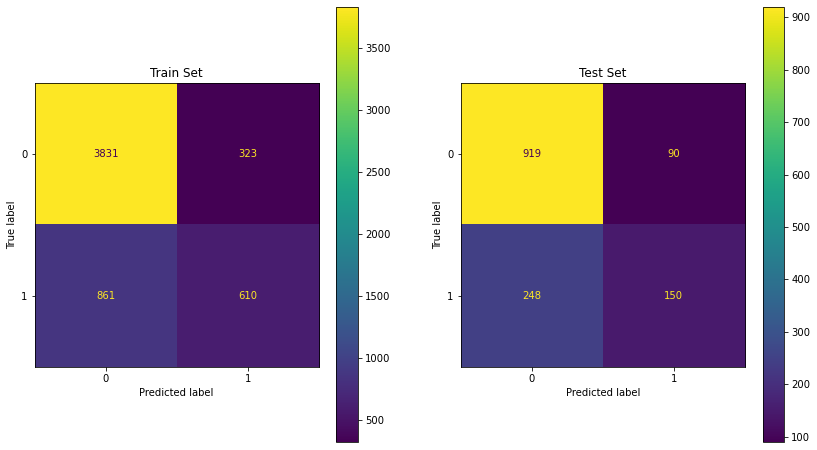

In [168]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=11)

# Bear in mind that sklearn uses a different function for decission trees used for 
# classification ( to predict a categorical feature ): DecisionTreeClassifier() 
model = DecisionTreeClassifier(max_depth=3) #decision tree

model.fit(X_train, y_train) #creates the model, creates the tree

y_pred_train_dt = model.predict(X_train)
y_pred_test_dt = model.predict(X_test)


performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

fig, ax = plt.subplots(1,2, figsize=(14,8))


#print("Confusion matrix for the train set")
#print(confusion_matrix(y_train,y_pred_train_dt).T)
plot_confusion_matrix(model,X_train,y_train,ax=ax[0], values_format = 'd')
ax[0].title.set_text("Train Set")

#print("Confusion matrix for the test set")

#print(confusion_matrix(y_test,y_pred_test_dt).T)
plot_confusion_matrix(model,X_test,y_test,ax=ax[1],values_format = 'd')
ax[1].title.set_text("Test Set")

In [169]:
X_train.shape

(5625, 4)

<BarContainer object of 4 artists>

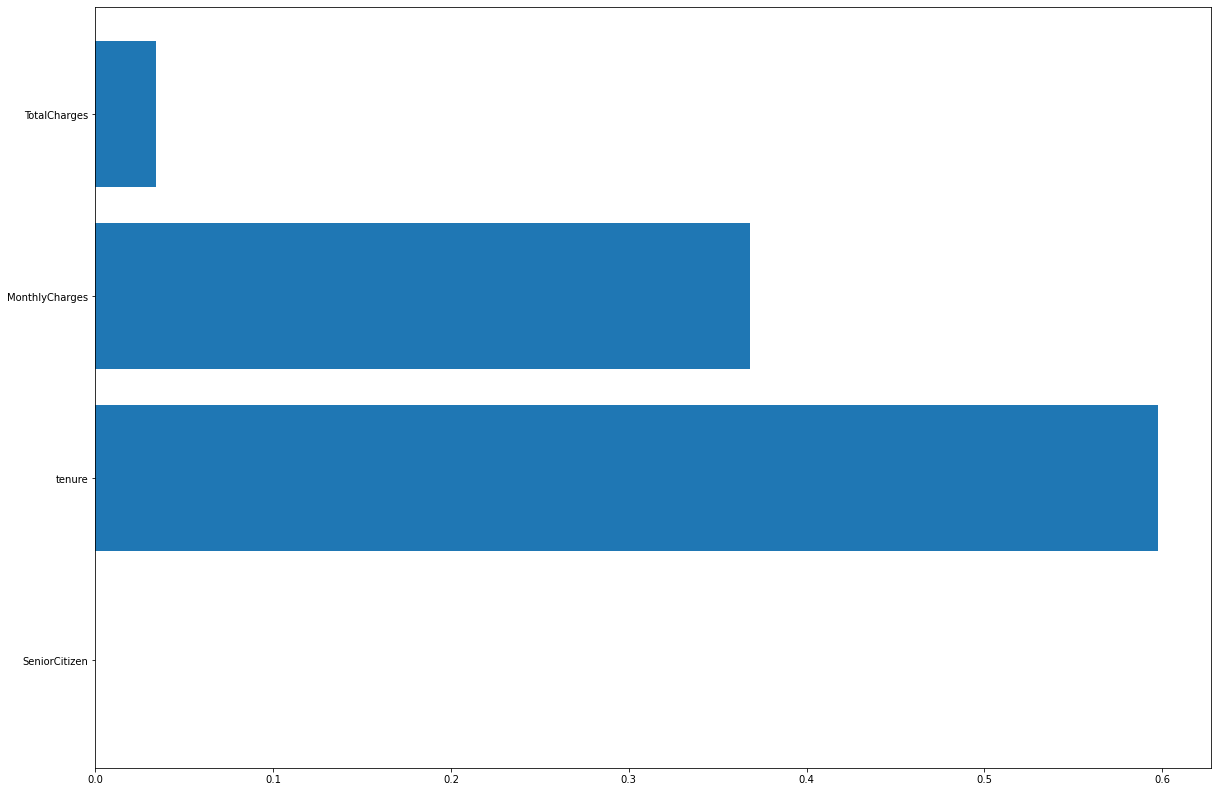

In [170]:
plt.figure(figsize=(20,14))
plt.barh(X.columns,model.feature_importances_)

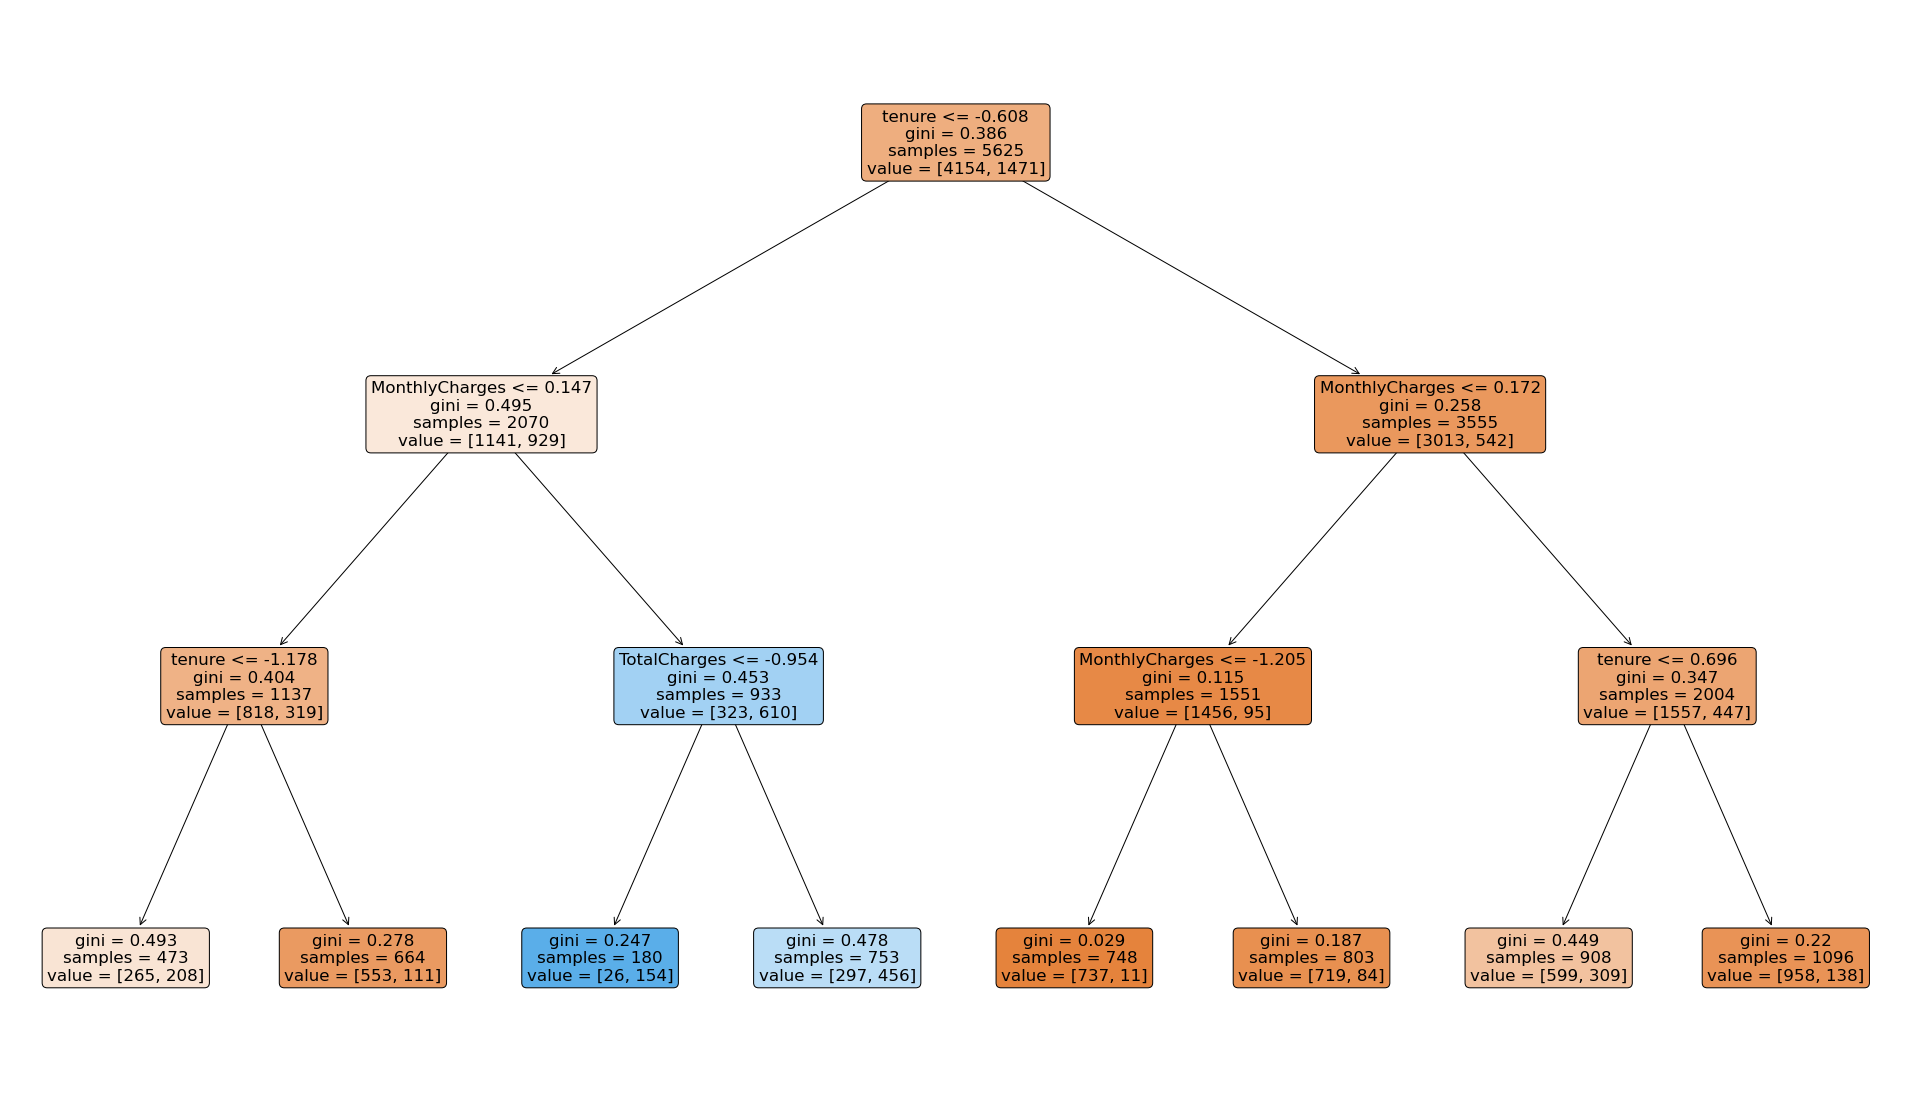

In [171]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (34,20))

plot_tree(model,filled = True, rounded=True,feature_names=X.columns)
plt.show() 

**Round 3**

In [173]:
len(X_train)

5625

In [174]:
y_train.value_counts()

Yes
0      4154
1      1471
dtype: int64

In [175]:
X_train


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
6730,2.271039,0.308766,0.478722,0.419371
5715,-0.440327,-1.280248,0.217784,-0.975885
6709,-0.440327,1.612573,-1.297980,-0.184902
3293,-0.440327,-1.158016,-1.487450,-0.970613
2624,-0.440327,-1.239504,0.196178,-0.945288
...,...,...,...,...
1293,-0.440327,-1.117272,0.359056,-0.829786
4023,-0.440327,-1.117272,-0.458659,-0.880831
5200,-0.440327,-0.750577,-0.177777,-0.662862
3775,-0.440327,-0.139417,-1.519029,-0.773755


In [176]:
y_train

,Yes
6740,1
5724,1
6719,0
3298,0
2629,1
...,...
1297,0
4030,0
5208,0
3781,0


# balance X_train, y_train

In [177]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [178]:
X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.value_counts()

Yes
1      4154
0      4154
dtype: int64

**Apply K-fold cross validation**

In [179]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.datasets import load_iris

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
import warnings
warnings.filterwarnings('ignore')

In [180]:
#Decision tree classification
X, y = load_iris(return_X_y=True)
print("X has %d rows and %d columns"  %(X.shape[0],X.shape[1]))
print("y has %d rows"  %(y.shape[0]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
print("The (mean) accuracy on the test set is %.2f" %(model.score(X_test, y_test)))
print("The (mean) accuracy on the train data is %.2f" %(model.score(X_train, y_train)))

X has 150 rows and 4 columns
y has 150 rows
The (mean) accuracy on the test set is 0.93
The (mean) accuracy on the train data is 1.00


In [181]:
scores=cross_val_score(model, X_train, y_train, cv=5) # 5 cv foldings
scores

array([0.91666667, 0.83333333, 0.95833333, 0.95833333, 0.91666667])

In [182]:
print("Five-fold cv results: \n %0.2f mean accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Five-fold cv results: 
 0.92 mean accuracy with a standard deviation of 0.05
